In [109]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# Load dataset

In [110]:
import pickle
ball_data = pickle.load(open('ball_data.pkl', 'rb'))
match_data = pickle.load(open('match_data.pkl', 'rb'))

In [111]:
df=pd.merge(ball_data, match_data, on='match_id', how='inner')

In [112]:
df['current_score'] = df.groupby(['match_id', 'innings'])['runs_batter'].cumsum() + df.groupby(['match_id', 'innings'])['runs_extras'].cumsum()

In [113]:
first_innings = df[df['innings'] == '1st innings']

# Get total runs scored in first innings for each match
first_innings_total = first_innings.groupby('match_id')['current_score'].max().reset_index()
first_innings_total['target'] = first_innings_total['current_score'] + 1

# Display the target for each match
# Merge the target column back to the main dataframe
df = df.merge(first_innings_total[['match_id', 'target']], on='match_id', how='left')
df.head()

,match_id,innings,ball,batting_team,batter,non_striker,bowler,runs_batter,runs_extras,runs_total,...,team2,venue,city,dates,winner,by_runs,by_wickets,player_of_match,current_score,target
0,1001349,1st innings,0.1,Australia,AJ Finch,M Klinger,SL Malinga,0,0,0,...,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],0,169
1,1001349,1st innings,0.2,Australia,AJ Finch,M Klinger,SL Malinga,0,0,0,...,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],0,169
2,1001349,1st innings,0.3,Australia,AJ Finch,M Klinger,SL Malinga,1,0,1,...,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],1,169
3,1001349,1st innings,0.4,Australia,M Klinger,AJ Finch,SL Malinga,2,0,2,...,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],3,169
4,1001349,1st innings,0.5,Australia,M Klinger,AJ Finch,SL Malinga,0,0,0,...,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],3,169


In [114]:
df['player_dismissed'] = df['player_dismissed'].apply(lambda x: 0 if x == None else 1)

In [115]:
df['player_dismissed'] = df['player_dismissed'].astype('int')
df

,match_id,innings,ball,batting_team,batter,non_striker,bowler,runs_batter,runs_extras,runs_total,...,team2,venue,city,dates,winner,by_runs,by_wickets,player_of_match,current_score,target
0,1001349,1st innings,0.1,Australia,AJ Finch,M Klinger,SL Malinga,0,0,0,...,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],0,169
1,1001349,1st innings,0.2,Australia,AJ Finch,M Klinger,SL Malinga,0,0,0,...,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],0,169
2,1001349,1st innings,0.3,Australia,AJ Finch,M Klinger,SL Malinga,1,0,1,...,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],1,169
3,1001349,1st innings,0.4,Australia,M Klinger,AJ Finch,SL Malinga,2,0,2,...,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],3,169
4,1001349,1st innings,0.5,Australia,M Klinger,AJ Finch,SL Malinga,0,0,0,...,Sri Lanka,Melbourne Cricket Ground,None,[2017-02-17],Sri Lanka,NaN,5.0,[DAS Gunaratne],3,169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687330,995469,2nd innings,17.1,Australia,TM Head,PM Nevill,SS Pathirana,1,0,1,...,Australia,R Premadasa Stadium,Colombo,[2016-09-09],Australia,NaN,4.0,[GJ Maxwell],121,129
687331,995469,2nd innings,17.2,Australia,PM Nevill,TM Head,SS Pathirana,3,0,3,...,Australia,R Premadasa Stadium,Colombo,[2016-09-09],Australia,NaN,4.0,[GJ Maxwell],124,129
687332,995469,2nd innings,17.3,Australia,TM Head,PM Nevill,SS Pathirana,0,0,0,...,Australia,R Premadasa Stadium,Colombo,[2016-09-09],Australia,NaN,4.0,[GJ Maxwell],124,129
687333,995469,2nd innings,17.4,Australia,TM Head,PM Nevill,SS Pathirana,0,0,0,...,Australia,R Premadasa Stadium,Colombo,[2016-09-09],Australia,NaN,4.0,[GJ Maxwell],124,129


In [116]:
wickets_fallen = df.groupby(['match_id','innings'])['player_dismissed'].cumsum()

df['wickets_left'] = 10 - wickets_fallen

print(df['wickets_left'].unique())

[10  9  8  7  6  5  4  3  2  1  0]


In [117]:
teams= [
    "India", "Sri Lanka", "Afghanistan", "Australia", 
    "Bangladesh", "England", "South Africa", "United States", 
    "West Indies", "Ireland", "New Zealand", "Pakistan", 
    "Canada", "Italy", "Netherlands", "Namibia", 
    "Zimbabwe", "Nepal", "Oman", "United Arab Emirates"
]

In [118]:
df = df[df['team1'].isin(teams)]
df = df[df['team2'].isin(teams)]


In [ ]:
cities = np.where(df['city'].isnull(),df['venue'].str.split().apply(lambda x:x[0]),df['city'])

In [120]:
df['city'] = cities

In [121]:
city=sorted(df['city'].unique().tolist())

In [122]:
team=sorted(df['team1'].unique().tolist())


In [123]:
df['over'] = df['ball'].astype(str).str.split('.').str[0].astype(int)
df['ball_in_over'] = df['ball'].astype(str).str.split('.').str[1].astype(int)

In [124]:
df['balls_bowled'] = (df['over'] * 6) + df['ball_in_over']

df['balls_remaining'] = 120 - df['balls_bowled']

df['crr'] = np.where(df['balls_bowled'] > 0, (df['current_score'] * 6) / df['balls_bowled'], 0)
df['rr'] = np.where(df['balls_remaining'] > 0, ((df['target'] - df['current_score']) * 6) / df['balls_remaining'], 0)

df['crr'].replace([np.inf, -np.inf], 0, inplace=True)
df['rr'].replace([np.inf, -np.inf], 0, inplace=True)

C:\Users\Pulkit\AppData\Local\Temp\ipykernel_23324\893733073.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['crr'].replace([np.inf, -np.inf], 0, inplace=True)
C:\Users\Pulkit\AppData\Local\Temp\ipykernel_23324\893733073.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

Fo

In [125]:
df['winner_flag'] = np.where(df['winner'] == df['batting_team'], 1, 0)

In [126]:
df['runs_left'] = df['target'] - df['current_score']

In [127]:
def last_5_over_stats(group):
    group = group.sort_values('ball')
    group['runs_last_5'] = group['runs_batter'].rolling(window=30, min_periods=30).sum()
    group['wickets_last_5'] = group['wicket_type'].notnull().rolling(window=30, min_periods=1).sum()
    return group

df = df.groupby(['match_id', 'innings'], group_keys=False).apply(last_5_over_stats)

C:\Users\Pulkit\AppData\Local\Temp\ipykernel_23324\1889328934.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby(['match_id', 'innings'], group_keys=False).apply(last_5_over_stats)


In [128]:
df['bowling_team'] = np.where(df['batting_team'] == df['team1'], df['team2'], df['team1'])

In [129]:
df = df[df['innings'] == '2nd innings']
features = ['batting_team','bowling_team','current_score', 'wickets_left','balls_remaining', 'runs_left','crr', 'rr', 'runs_last_5', 'wickets_last_5']

In [130]:
df['winner_flag'].isnull().sum()

np.int64(0)

In [131]:
df.shape

(137863, 36)

In [132]:
df.isnull().sum()

match_id                 0
innings                  0
ball                     0
batting_team             0
batter                   0
non_striker              0
bowler                   0
runs_batter              0
runs_extras              0
runs_total               0
extras_type         130178
wicket_type         130275
player_dismissed         0
team1                    0
team2                    0
venue                    0
city                     0
dates                    0
winner                2631
by_runs              66120
by_wickets           74374
player_of_match       3786
current_score            0
target                   0
wickets_left             0
over                     0
ball_in_over             0
balls_bowled             0
balls_remaining          0
crr                      0
rr                       0
winner_flag              0
runs_left                0
runs_last_5          35926
wickets_last_5           0
bowling_team             0
dtype: int64

In [133]:
df=df.dropna(subset=['runs_last_5'])

In [134]:
df.isnull().sum()

match_id                0
innings                 0
ball                    0
batting_team            0
batter                  0
non_striker             0
bowler                  0
runs_batter             0
runs_extras             0
runs_total              0
extras_type         96555
wicket_type         96021
player_dismissed        0
team1                   0
team2                   0
venue                   0
city                    0
dates                   0
winner               1861
by_runs             48087
by_wickets          55711
player_of_match      2639
current_score           0
target                  0
wickets_left            0
over                    0
ball_in_over            0
balls_bowled            0
balls_remaining         0
crr                     0
rr                      0
winner_flag             0
runs_left               0
runs_last_5             0
wickets_last_5          0
bowling_team            0
dtype: int64

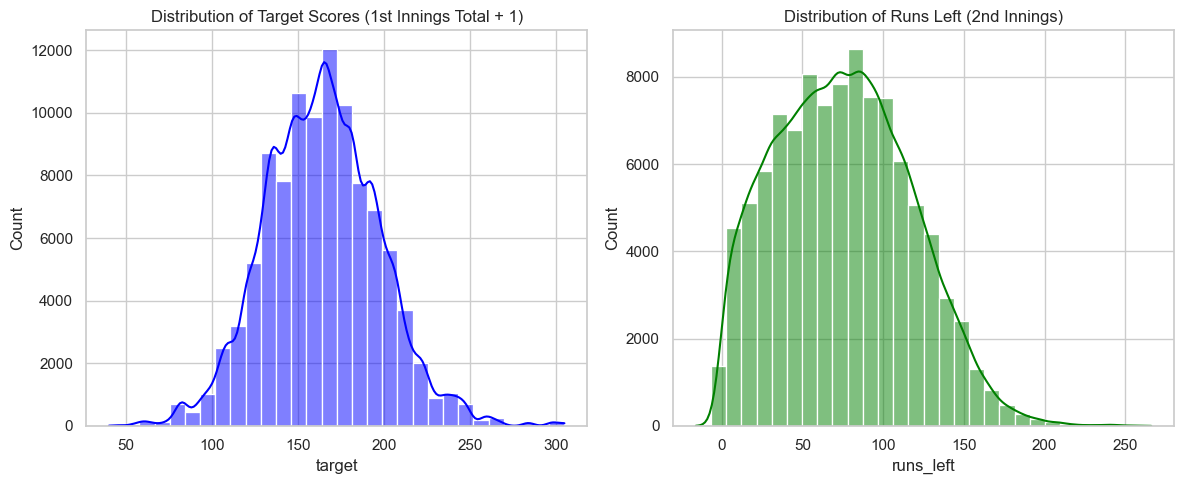

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visual style
sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 5))

# Distribution of Target Scores
plt.subplot(1, 2, 1)
sns.histplot(df['target'], bins=30, kde=True, color='blue')
plt.title('Distribution of Target Scores (1st Innings Total + 1)')

# Distribution of Runs Left in 2nd Innings
plt.subplot(1, 2, 2)
sns.histplot(df['runs_left'], bins=30, kde=True, color='green')
plt.title('Distribution of Runs Left (2nd Innings)')

plt.tight_layout()
plt.show()

C:\Users\Pulkit\AppData\Local\Temp\ipykernel_23324\2760135558.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=wickets_win_rate.index, y=wickets_win_rate.values, palette='viridis')


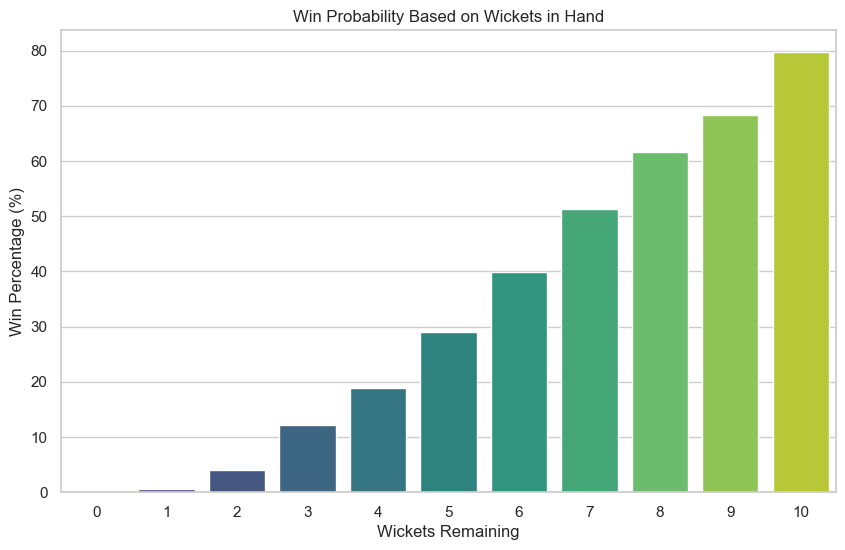

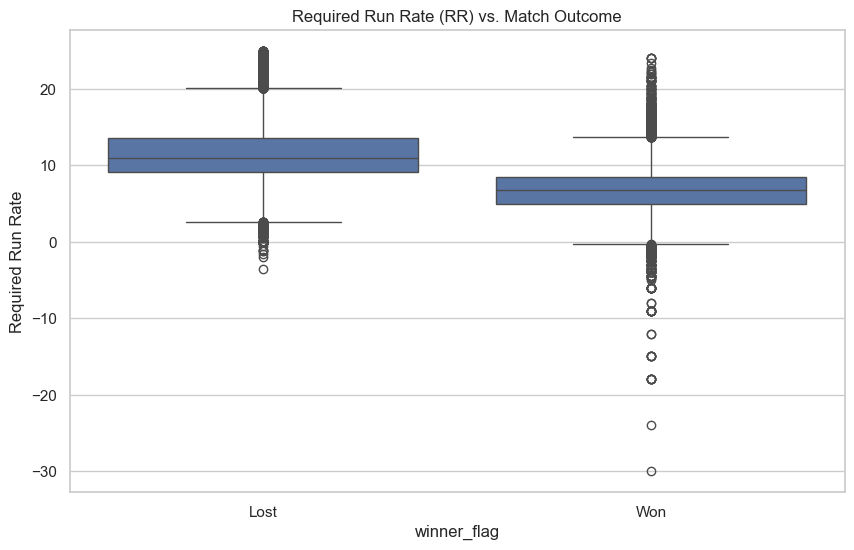

In [136]:
# Win Percentage based on Wickets Left
plt.figure(figsize=(10, 6))
wickets_win_rate = df.groupby('wickets_left')['winner_flag'].mean() * 100
sns.barplot(x=wickets_win_rate.index, y=wickets_win_rate.values, palette='viridis')
plt.ylabel('Win Percentage (%)')
plt.xlabel('Wickets Remaining')
plt.title('Win Probability Based on Wickets in Hand')
plt.show()

plt.figure(figsize=(10, 6))
# Filtering for realistic RR to avoid outliers
sns.boxplot(x='winner_flag', y='rr', data=df[df['rr'] < 25])
plt.xticks([0, 1], ['Lost', 'Won'])
plt.ylabel('Required Run Rate')
plt.title('Required Run Rate (RR) vs. Match Outcome')
plt.show()

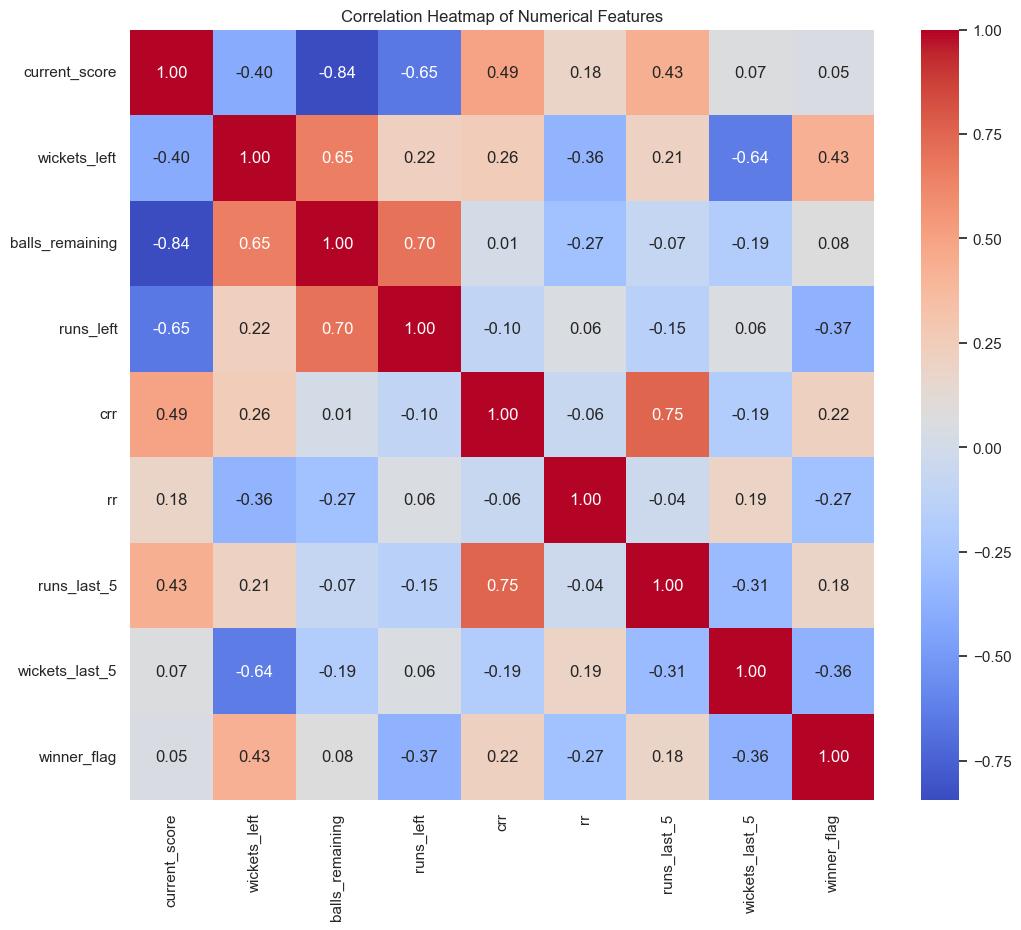

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define only the numerical features for correlation
numerical_features = [
    'current_score', 'wickets_left', 'balls_remaining', 
    'runs_left', 'crr', 'rr', 'runs_last_5', 'wickets_last_5'
]

plt.figure(figsize=(12, 10))

# Calculate correlation only on numerical columns + the target flag
correlation_matrix = df[numerical_features + ['winner_flag']].corr()

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

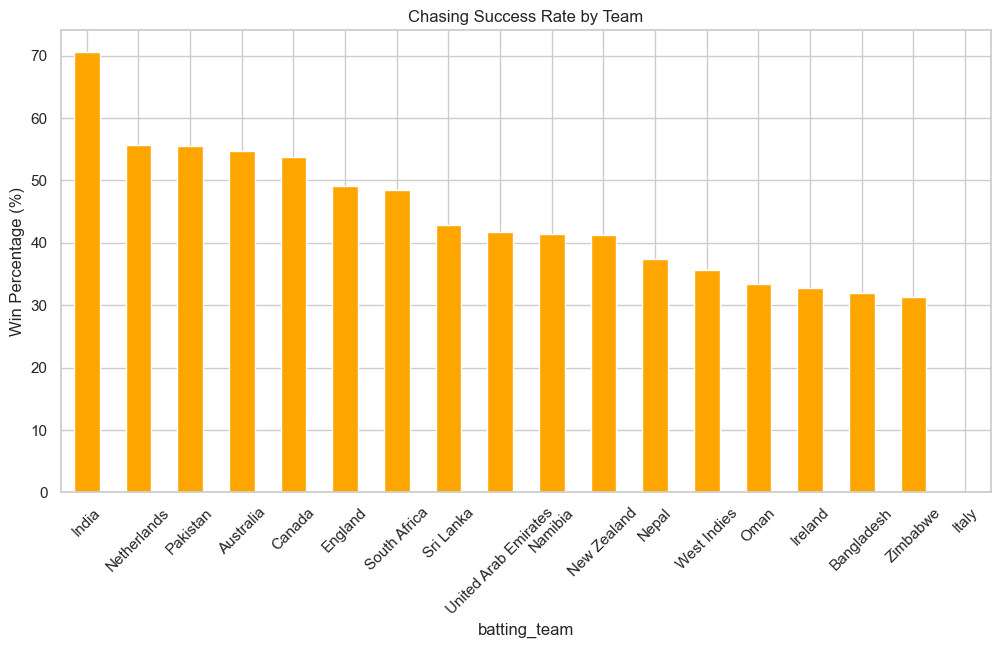

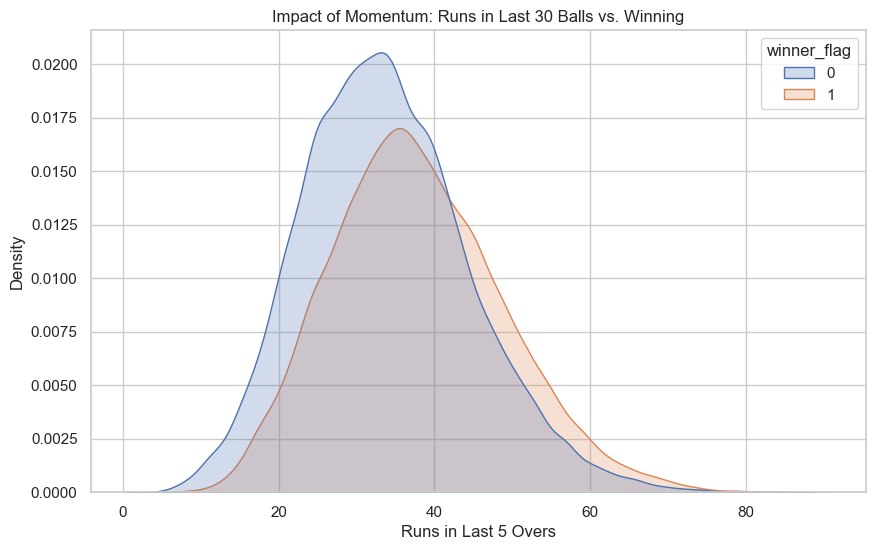

In [138]:
# Team Success Rate in 2nd Innings
plt.figure(figsize=(12, 6))
team_chase_success = df.groupby('batting_team')['winner_flag'].mean().sort_values(ascending=False) * 100
team_chase_success.plot(kind='bar', color='orange')
plt.ylabel('Win Percentage (%)')
plt.title('Chasing Success Rate by Team')
plt.xticks(rotation=45)
plt.show()

# Runs scored in last 5 overs vs Match Outcome
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='runs_last_5', hue='winner_flag', fill=True)
plt.title('Impact of Momentum: Runs in Last 30 Balls vs. Winning')
plt.xlabel('Runs in Last 5 Overs')
plt.show()

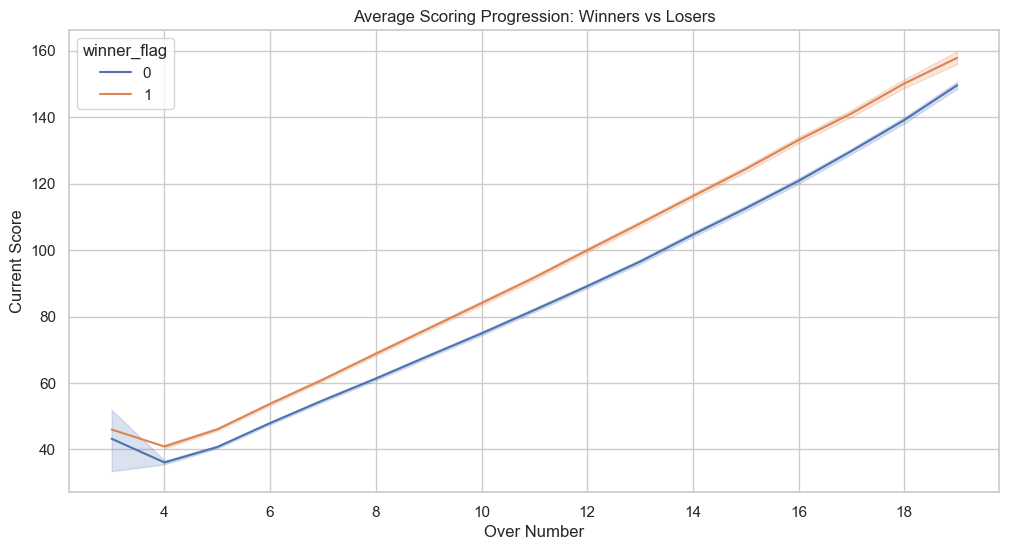

In [139]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='over', y='current_score', hue='winner_flag')
plt.title('Average Scoring Progression: Winners vs Losers')
plt.xlabel('Over Number')
plt.ylabel('Current Score')
plt.show()

In [140]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
X=df[features]
y=df['winner_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

trf = ColumnTransformer(transformers=[
    ('cat', OneHotEncoder(handle_unknown='ignore'), ['batting_team', 'bowling_team']),
    ('num', StandardScaler(), ['current_score', 'balls_remaining', 'wickets_left', 'runs_left', 'crr', 'rr', 'runs_last_5', 'wickets_last_5'])
])

In [146]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, fbeta_score

pipe = Pipeline(steps=[
    ('preprocessor', trf),
    ('classifier', LogisticRegression(solver='liblinear', max_iter=1000, random_state=42))
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

f2 = fbeta_score(y_test, y_pred, beta=2)
print(f"F2 Score: {f2:.4f}")
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report,roc_auc_score


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc_score = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score:.4f}")

F2 Score: 0.8196
Accuracy: 0.8377
Precision: 0.8238
Recall: 0.8185
F1 Score: 0.8212

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85     11110
           1       0.82      0.82      0.82      9278

    accuracy                           0.84     20388
   macro avg       0.84      0.84      0.84     20388
weighted avg       0.84      0.84      0.84     20388

ROC-AUC Score: 0.8362


ROC-AUC Score: 0.9235


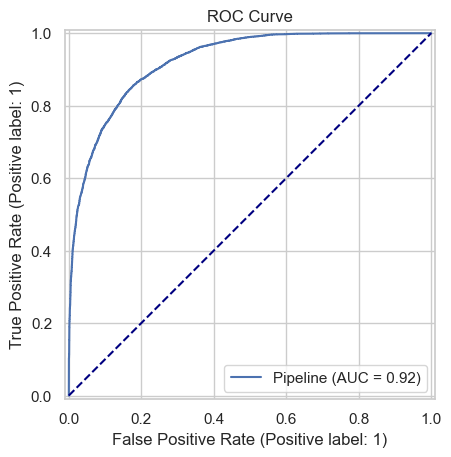

In [142]:
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

y_probs = pipe.predict_proba(X_test)[:, 1]

auc_score = roc_auc_score(y_test, y_probs)
print(f"ROC-AUC Score: {auc_score:.4f}")

RocCurveDisplay.from_estimator(pipe, X_test, y_test)
plt.title("ROC Curve")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.show()

Average Precision: 0.9096


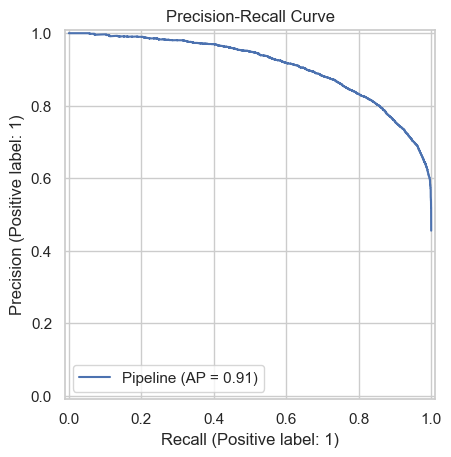

In [143]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, average_precision_score
import matplotlib.pyplot as plt

avg_precision = average_precision_score(y_test, y_probs)
print(f"Average Precision: {avg_precision:.4f}")

PrecisionRecallDisplay.from_estimator(pipe, X_test, y_test)
plt.title("Precision-Recall Curve")
plt.show()

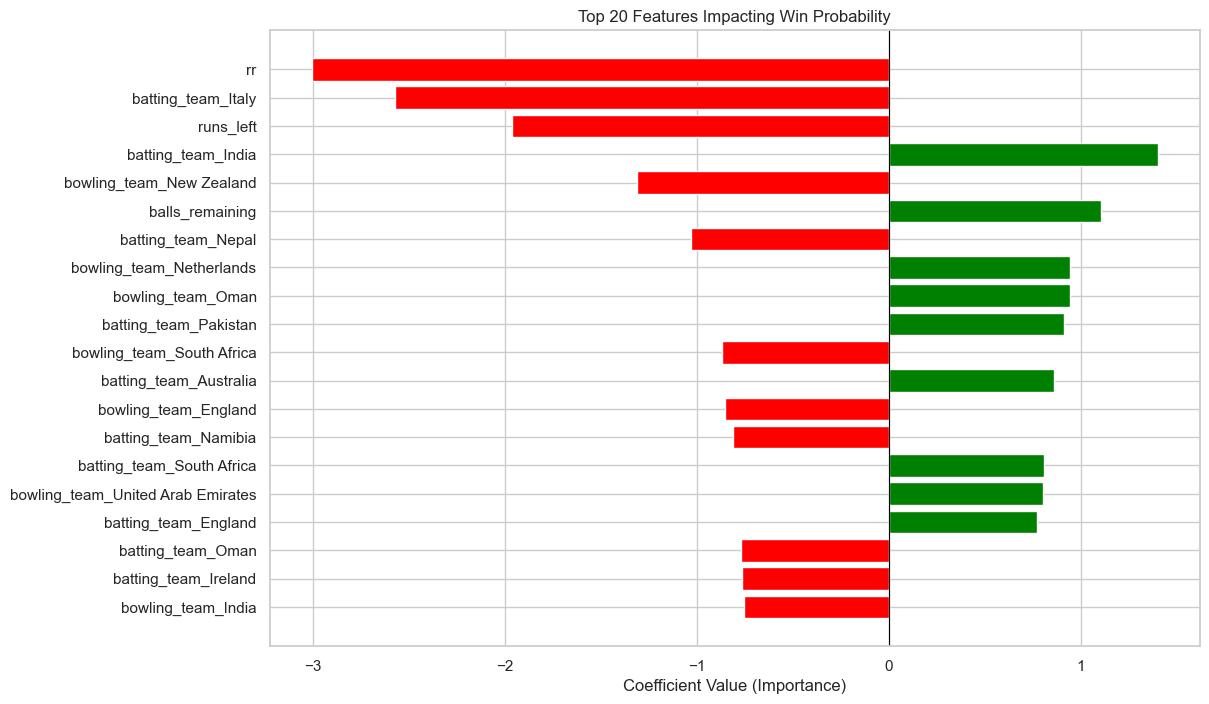

In [144]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

ohe_feature_names = pipe.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(['batting_team', 'bowling_team'])

num_feature_names = ['current_score', 'wickets_left', 'balls_remaining', 'runs_left', 'crr', 'rr', 'runs_last_5', 'wickets_last_5']

all_feature_names = np.concatenate([ohe_feature_names, num_feature_names])

coefs = pipe.named_steps['classifier'].coef_[0]

feature_importance = pd.DataFrame({
    'Feature': all_feature_names,
    'Importance': coefs
})
feature_importance['abs_importance'] = feature_importance['Importance'].abs()
top_20_features = feature_importance.sort_values(by='abs_importance', ascending=False).head(20)

plt.figure(figsize=(12, 8))
colors = ['red' if x < 0 else 'green' for x in top_20_features['Importance']]
plt.barh(top_20_features['Feature'], top_20_features['Importance'], color=colors)
plt.xlabel('Coefficient Value (Importance)')
plt.title('Top 20 Features Impacting Win Probability')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.8)
plt.gca().invert_yaxis()  # Put most important at the top
plt.show()

In [145]:
import pickle

pickle.dump(pipe, open('pipe_t20_second_inning.pkl', 'wb'))
pickle.dump(team, open('team_t20_second_inning.pkl', 'wb'))
pickle.dump(city, open('city_t20_second_inning.pkl', 'wb'))